In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import random
import re
import time

In [ ]:
YELP_TOKEN = "ICRpGdXLhSdC56T5FyWiXPpRTwxs6lLRYXCIrO657552aHk9cNbf2AtMEDrJVgaH8Kpp1ZZg1oX7BiTnKT9vDCht4ENWtLkvU4iorsmDMIO_MxjTot6TmKejYp-cZXYx"

In [ ]:
r = requests.get("https://api.yelp.com/v3/businesses/search?location=Brampton&limit=50", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [ ]:
print(r.status_code, r.reason, r.content)

200 OK b'{"businesses": [{"id": "AYxhg8pCPpTayz6TYfNzFg", "alias": "sushi-house-brampton-3", "name": "Sushi House", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/rpU-JjpbWpUUE0qvC9DheA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/sushi-house-brampton-3?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=LMJ4bteXjb-zfnczvVEOTg", "review_count": 175, "categories": [{"alias": "japanese", "title": "Japanese"}, {"alias": "sushi", "title": "Sushi Bars"}], "rating": 4.5, "coordinates": {"latitude": 43.687913, "longitude": -79.762916}, "transactions": [], "price": "$$", "location": {"address1": "135 Main Street N", "address2": "", "address3": "", "city": "Brampton", "zip_code": "L6X", "country": "CA", "state": "ON", "display_address": ["135 Main Street N", "Brampton, ON L6X", "Canada"]}, "phone": "+19054574882", "display_phone": "+1 905-457-4882", "distance": 2135.909912785532}, {"id": "aO7CRy6Gi_q9PpA5uXe_OA", "a

In [ ]:
r.json()

{'businesses': [{'id': 'AYxhg8pCPpTayz6TYfNzFg',
   'alias': 'sushi-house-brampton-3',
   'name': 'Sushi House',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/rpU-JjpbWpUUE0qvC9DheA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/sushi-house-brampton-3?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=LMJ4bteXjb-zfnczvVEOTg',
   'review_count': 175,
   'categories': [{'alias': 'japanese', 'title': 'Japanese'},
    {'alias': 'sushi', 'title': 'Sushi Bars'}],
   'rating': 4.5,
   'coordinates': {'latitude': 43.687913, 'longitude': -79.762916},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '135 Main Street N',
    'address2': '',
    'address3': '',
    'city': 'Brampton',
    'zip_code': 'L6X',
    'country': 'CA',
    'state': 'ON',
    'display_address': ['135 Main Street N', 'Brampton, ON L6X', 'Canada']},
   'phone': '+19054574882',
   'display_phone': '+1 905-457-4882',
  

In [ ]:
# Initializing two lists to store data about reviews from the Yelp API.
# 'rev_rating_url' will store tuples containing the review URL and its associated rating.
# 'review_labels' will store tuples containing the review text (without a trailing period) and its rating.
rev_rating_url = []
review_labels = []

# Looping through each business retrieved from a prior API request (presumably stored in 'r').
# The 'r.json()' method converts the JSON response to a dictionary,
# and we access the list of businesses using 'r.json()['businesses']'.
for business in r.json()['businesses']:
    # For each business, making an API request to get its reviews.
    # The URL for the reviews API includes the business's ID. We also include an Authorization header
    # with a Bearer token ('YELP_TOKEN') to authenticate the request.
    # The '.json()' method converts the JSON response from the Yelp API to a dictionary.
    reviews = requests.get("https://api.yelp.com/v3/businesses/%s/reviews" % business['id'], headers={"Authorization": "Bearer %s" % YELP_TOKEN}).json()

    # Looping through each review in the reviews returned by the Yelp API.
    for review in reviews['reviews']:
        # Appending a tuple to 'review_labels' that includes the review text (with trailing periods stripped) and the review rating.
        review_labels.append((review['text'].rstrip('.'), review['rating']))

        # Appending a tuple to 'rev_rating_url' that includes the review URL and the review rating.
        rev_rating_url.append((review['url'], review['rating']))


In [ ]:
review_labels

[('Such beautifully made sushi, lovely environment, staff are amazing and always helpful and friendly.\nThe sushi is beautifully served and prepared and always',
  5),
 ("It's a nice little gem in Brampton near the YMCA - clean and quite well-decorated.  The food is fresh and authentic.  We ordered the calamari which I found",
  4),
 ("We ordered take-out party tray for mother's day, the service was quick and the order was ready in 20 minutes. The party tray consisted of nigiri, sashimi",
  5),
 ("Great food and service! Honestly this place has the absolute best wings in Brampton. Don't sleep on the veggie tempura either. The employees are always so",
  5),
 ('Hands down one of the best places to get Chinese cuisine in the GTA. I saw many good reviews about this restaurant so my partner and I decided to give it a',
  4),
 ("The food was good didn't take too long considering everything is made to order, I had the BBQ pork fried rice with shrimp and wings (shrimp added on for $2)",
  4),

In [ ]:
rev_rating_url

[('https://www.yelp.com/biz/sushi-house-brampton-3?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&hrid=n4VHD69CkmTP3bF6qfasRw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=LMJ4bteXjb-zfnczvVEOTg',
  5),
 ('https://www.yelp.com/biz/sushi-house-brampton-3?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&hrid=M8U3u3OVsQX-o6ZEo7PmKw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=LMJ4bteXjb-zfnczvVEOTg',
  4),
 ('https://www.yelp.com/biz/sushi-house-brampton-3?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&hrid=p62Lx8rflbTxdraIqr-RBg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=LMJ4bteXjb-zfnczvVEOTg',
  5),
 ('https://www.yelp.com/biz/green-bites-dumpling-and-tea-bar-brampton?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&hrid=Z1BlAZXrXFP8E3Dla8EPZw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=LMJ4bteXjb-zfnczvVEOTg',
  5),
 ('https://www.yelp.com/biz/green-bites-dumpling-and-tea-bar-brampton?adjust_creative=LMJ4bteXjb-zfnc

In [ ]:
# Creating a list of tuples named 'review_features'. This list comprehension processes each tuple in 'review_labels'.
# Each tuple in 'review_labels' contains review text ('x') and a rating ('y').
# The text 'x' is split into words using the 'split' method with a space as the delimiter, resulting in a list of words.
# The second element of each new tuple in 'review_features' is determined by the rating 'y':
# If 'y' (the rating) is greater than 3, the sentiment label 'positive' is assigned.
# Otherwise, the sentiment label 'negative' is assigned.
# Each tuple in 'review_features' therefore contains a list of words from the review and its sentiment label ('positive' or 'negative').
review_features = [(x.split(' '), 'positive' if y > 3 else 'negative') for (x, y) in review_labels]

review_features

[(['Such',
   'beautifully',
   'made',
   'sushi,',
   'lovely',
   'environment,',
   'staff',
   'are',
   'amazing',
   'and',
   'always',
   'helpful',
   'and',
   'friendly.\nThe',
   'sushi',
   'is',
   'beautifully',
   'served',
   'and',
   'prepared',
   'and',
   'always'],
  'positive'),
 (["It's",
   'a',
   'nice',
   'little',
   'gem',
   'in',
   'Brampton',
   'near',
   'the',
   'YMCA',
   '-',
   'clean',
   'and',
   'quite',
   'well-decorated.',
   '',
   'The',
   'food',
   'is',
   'fresh',
   'and',
   'authentic.',
   '',
   'We',
   'ordered',
   'the',
   'calamari',
   'which',
   'I',
   'found'],
  'positive'),
 (['We',
   'ordered',
   'take-out',
   'party',
   'tray',
   'for',
   "mother's",
   'day,',
   'the',
   'service',
   'was',
   'quick',
   'and',
   'the',
   'order',
   'was',
   'ready',
   'in',
   '20',
   'minutes.',
   'The',
   'party',
   'tray',
   'consisted',
   'of',
   'nigiri,',
   'sashimi'],
  'positive'),
 (['Great',

In [ ]:
import json
from google.colab import files
json_data = [{"review": review, "sentiment": sentiment} for review, sentiment in review_features]

json_data = json.dumps(json_data, indent=4)
with open('data.json', 'w') as file:
    file.write(json_data)
files.download('data.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier

# Shuffling the 'review_features' list randomly. This step is crucial for ensuring that the training and test sets are representative and not biased by the order of the data.
random.shuffle(review_features)

# Splitting the 'review_features' list into training and test datasets.
# Here, 120 entries from the shuffled list are assigned to 'training_docs', and the remainder to 'test_docs'.
# This split is arbitrary and can be adjusted based on the total number of reviews available and the desired training/test ratio.
training_docs = review_features[:120]
test_docs = review_features[120:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

# Creating an instance of the SentimentAnalyzer class.
# This class from NLTK is used for training sentiment analysis models, specifically here for training a Naive Bayes classifier.
sentim_analyzer = SentimentAnalyzer()

Training: 120, Testing: 30


In [ ]:
# Creating a list comprehension that applies 'mark_negation' to each document in 'training_docs'.
# The 'mark_negation' function from NLTK is specifically designed to handle negations in text data,
# such as converting "not good" to "not good_NEG". This helps in identifying the scope of negation in sentiment analysis,
# which can significantly impact the sentiment conveyed by phrases.
# Each 'doc' in 'training_docs' is a tuple where the first element is a list of words.
# 'mark_negation' is applied to the list of words (doc[0]).
negated_docs = [nltk.sentiment.util.mark_negation(doc[0]) for doc in training_docs]

# Using the 'all_words' method of the SentimentAnalyzer to extract all words from the negated documents.
# This method aggregates all words into a single list, which is useful for creating features for training a classifier.
all_words_neg = sentim_analyzer.all_words(negated_docs)
all_words_neg

['Quality',
 'not',
 'up_NEG',
 'to_NEG',
 'the_NEG',
 'marks_NEG',
 'and_NEG',
 'petite_NEG',
 'portions_NEG',
 '.',
 'Was',
 'very',
 'excited',
 'to',
 'order',
 'but',
 'got',
 'disappointed',
 'after',
 'tasting',
 'the',
 'Chinese',
 'food',
 '',
 'I',
 'discovered',
 'this',
 'place',
 'in',
 'the',
 'last',
 'year',
 'and',
 "it's",
 'been',
 'great.',
 '',
 'I',
 'love',
 'the',
 'bbq',
 'pork',
 'and',
 'chicken',
 'on',
 'dry',
 '(not',
 'saucy',
 'noodles).',
 '',
 "It's",
 'not',
 'your_NEG',
 'typical_NEG',
 'Chinese_NEG',
 'Moxie',
 'was',
 'a',
 'vibe!',
 'We',
 'visited',
 'this',
 'location',
 'with',
 'a',
 'large',
 'group',
 'one',
 'weekday',
 'evening',
 'without',
 'reservation',
 'and',
 'they',
 'were',
 'able',
 'to',
 'accommodate',
 'us',
 'right',
 'away.',
 'The',
 'Food',
 'is',
 'just',
 'amazing.',
 'Very',
 'flavourful',
 'and',
 'inexpensive.',
 "It's",
 'cooked',
 'in',
 'such',
 'a',
 'way',
 'that',
 'there',
 'is',
 'very',
 'little',
 'oil.',
 '

In [ ]:
# Using the 'unigram_word_feats' method of the SentimentAnalyzer to select unigram features.
# A unigram is a single standalone word. This method identifies unigrams from the list 'all_words_neg' that occur at least 'min_freq' times.
# 'min_freq=4' specifies that a word must appear at least four times in the dataset to be considered a feature.
# This helps in reducing the noise in the feature set by eliminating rare words that might not have significant predictive power.
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)

# Adding a feature extractor to the SentimentAnalyzer.
# The 'add_feat_extractor' function configures the SentimentAnalyzer to use a specified feature extraction function.
# 'nltk.sentiment.util.extract_unigram_feats' is used here to extract unigram features based on the unigrams identified earlier.
# 'unigrams=unigram_feats' specifies the list of unigrams to be used as features for training the classifier.
# This function will now automatically extract these features from text data when training or testing the sentiment classifier.
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [ ]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [ ]:
trainer = NaiveBayesClassifier.train
# Training the sentiment analysis classifier using the 'train' method specified by 'trainer'.
# The 'train' method is called on the sentiment analyzer, with the training data provided as 'training_set'.
# 'training_set' should be formatted as a list of tuples, where each tuple contains the feature dictionary and the label.
# The result is a trained classifier stored in the variable 'classifier'.
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.6666666666666666
F-measure [negative]: 0.16666666666666666
F-measure [positive]: 0.7916666666666667
Precision [negative]: 0.2
Precision [positive]: 0.76
Recall [negative]: 0.14285714285714285
Recall [positive]: 0.8260869565217391


<BarContainer object of 5 artists>

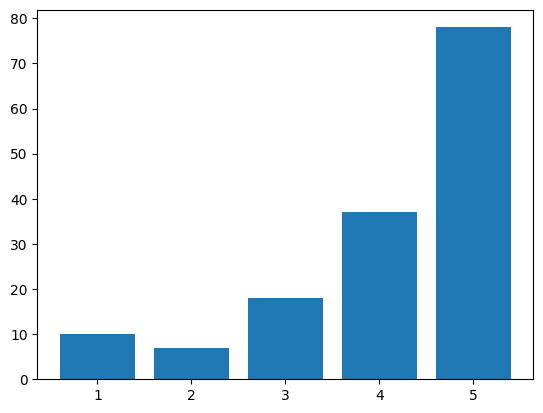

In [ ]:
from collections import defaultdict

c = defaultdict(int)
for x in review_labels:
    c[x[1]] += 1

plt.bar(c.keys(), c.values())

In [ ]:
review

{'id': 'jHZTQyfM84DU2IuCUoQzjg',
 'url': 'https://www.yelp.com/biz/henrys-fish-and-chips-brampton?adjust_creative=LMJ4bteXjb-zfnczvVEOTg&hrid=jHZTQyfM84DU2IuCUoQzjg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=LMJ4bteXjb-zfnczvVEOTg',
 'text': 'I had the Haddock & Chips special today which includes a bottled drink.\n\nThe fish and chips were served in a rectangular cardboard box, and the box was...',
 'rating': 5,
 'time_created': '2020-12-14 10:43:14',
 'user': {'id': 'VzgUaf4ZSpuAHuNG7w-Jfg',
  'profile_url': 'https://www.yelp.com/user_details?userid=VzgUaf4ZSpuAHuNG7w-Jfg',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/D2rA5Uas3OCzBGxbG7ojuQ/o.jpg',
  'name': 'Ross K.'}}

In [ ]:
# Initializing an empty list to store results.
random_results = []

# Looping through each business obtained from a previous Yelp API call stored in 'r'.
# 'r.json()['businesses']' extracts a list of businesses from the API response.
for business in r.json()['businesses']:
    # Getting the total number of reviews for the current business.
    review_count = business['review_count']

    # Generating a list of 3 unique random numbers, each representing a review number.
    # These numbers range from 1 to the total number of reviews for the business.
    review_numbers = random.sample(range(1, review_count + 1), 3)

    # Looping through each randomly selected review number.
    for review_number in review_numbers:
        # Calculating the modulus of the review number by 10 to find the offset within the page.
        mod = review_number % 10
        # Calculating the start index for pagination on Yelp's review page.
        # This determines which set of reviews to fetch (Yelp shows 10 reviews per page).
        start = review_number - mod - 10 if mod == 0 else review_number - mod

        # Using a try-except block to handle potential HTTP request exceptions.
        try:
            # Making an HTTP GET request to fetch the HTML of the reviews page.
            # This URL is constructed using the business URL and includes the 'start' query parameter for pagination.
            review_page_html = requests.get(f"{business['url']}&start={start}", timeout=10).text
            # Parsing the HTML content using BeautifulSoup.
            soup = BeautifulSoup(review_page_html, 'html.parser')
            # Locating the reviews container by its HTML ID.
            reviews = soup.find(id='reviews')

            # Checking if the reviews container is found.
            if reviews:
                # Finding all text elements of the reviews using a regular expression to match class names.
                text_elements = reviews.find_all('span', class_=re.compile("^raw__.*"))
                # Finding all rating elements using a 'div' with an 'aria-label' attribute that includes "star rating".
                rating_elements = reviews.find_all('div', attrs={"aria-label": re.compile("star rating")})

                # Ensuring that there are enough elements to match the modulus index.
                if len(text_elements) > mod and len(rating_elements) > mod:
                    # Extracting the review text and corresponding rating.
                    text = text_elements[mod - 1 if mod > 0 else 9].text
                    rating_text = rating_elements[mod]['aria-label']

                    # Checking if the first character of the rating text is a digit (indicating a valid rating).
                    if rating_text[0].isdigit():
                        # Converting the first character to an integer to get the rating.
                        rating = int(rating_text[0])
                        # Determining the sentiment based on the rating.
                        sentiment = 'positive' if rating > 3 else 'negative'
                        # Appending the review text and sentiment to the results list.
                        random_results.append((text, sentiment))
        # Handling exceptions raised by the HTTP request.
        except requests.RequestException as e:
            print(f"Error fetching review: {e}")


print(random_results)

[("A delicious lunch at Kingyo! Always amazing service, fresh ingredients and delicious offerings. We got an assortment of items to share for two. - Kingyo negitoro sushi - $9.90 for 3 pieces - a little saucier than I expected with all the soy dressing and wasabi mayo but very fresh negitoro and a great start to meal. - Pressed salmon sushi - $15.80 - super delicious sockeye salmon pressed sushi, I liked the guac and ikura on top! - Ebi-mayo - $12.80 - I get this at every Japanese izakaya because I can't resist deep fried tempura battered prawns - these had a great crunch. - Stone-grilled beef tongue - $11.80 - loved this since it was so unique to cook with the hot stone! You gotta cook it fast because the stone won't retain heat for too too long. The dipping sauce was SO good. I saved it for the next rice dish - Steak bowl - $18.80 - perfectly cooked medium rare steak over a bed of rice and half boiled egg and came with miso soup! Super delicious but could use a bit more salt.Pro-tip:

In [ ]:
randresult = []

for business in r.json()['businesses']:
    rev_count = business['review_count']
    rev_number = random.sample(range(1, review_count + 1), )

    for review_number in rev_number:
        mod = review_number % 10
        start = review_number - mod - 10 if mod == 0 else review_number - mod

        try:
            rev_page_html = requests.get(f"{business['url']}&start={start}", timeout=10).text
            soup = BeautifulSoup(rev_page_html, 'html.parser')
            reviews = soup.find(id='reviews')

            if reviews:
                text_elements = reviews.find_all('span', class_=re.compile("^raw__.*"))
                rate_elements = reviews.find_all('div', attrs={"aria-label": re.compile("star rating")})

                if len(text_elements) > mod and len(rate_elements) > mod:
                    text = text_elements[mod - 1 if mod > 0 else 9].text
                    words = text.split()
                    rating_text = rating_elements[mod]['aria-label']

                    if rating_text[0].isdigit():
                        rating = int(rating_text[0])
                        sentiment = 'positive' if rating > 3 else 'negative'
                        random_results.append((words, sentiment))
        except requests.RequestException as e:
            print(f"Error fetching review: {e}")

print(randresult)

[]


In [ ]:
random_results = []

for business in r.json()['businesses']:
    review_count = business['review_count']
    review_numbers = random.sample(range(1, review_count + 1), 3)

    for review_number in review_numbers:
        mod = review_number % 10
        start = review_number - mod - 10 if mod == 0 else review_number - mod

        try:
            review_page_html = requests.get(f"{business['url']}&start={start}", timeout=10).text
            soup = BeautifulSoup(review_page_html, 'html.parser')
            reviews = soup.find(id='reviews')

            if reviews:
                text_elements = reviews.find_all('span', class_=re.compile("^raw__.*"))
                rating_elements = reviews.find_all('div', attrs={"aria-label": re.compile("star rating")})

                if len(text_elements) > mod and len(rating_elements) > mod:
                    text = text_elements[mod - 1 if mod > 0 else 9].text
                    words = text.split()
                    rating_text = rating_elements[mod]['aria-label']

                    if rating_text[0].isdigit():
                        rating = int(rating_text[0])
                        sentiment = 'positive' if rating > 3 else 'negative'
                        random_results.append((words, sentiment))
        except requests.RequestException as e:
            print(f"Error fetching review: {e}")

print(random_results)

[(['Came', 'here', 'because', 'of', 'the', 'Yelp', 'reviews.', 'I', 'was', 'happy', 'that', 'it', 'was', 'quiet', 'and', 'we', 'even', 'had', 'a', 'private', 'area', 'to', 'ourselves.', 'The', 'crispy', 'soup', 'was', 'really', 'good-', 'it', 'was', 'a', 'broth', 'with', 'some', 'noodles', 'and', 'pieces', 'of', 'fried', 'tempura.', 'We', 'got', 'the', 'agadashi', 'tofu', 'as', 'an', 'appetizer', 'and', 'it', 'was', 'AMAZING!', 'Had', 'teriyaki', 'sauce', 'on', 'it-', 'nice', 'sized', 'pieces', '-', 'loved', 'it!', 'I', 'had', 'the', 'chicken', 'teriyaki', 'dinner', 'and', 'my', 'husband', 'had', 'the', 'salmon', 'sushi', 'dinner.', 'I', 'did', 'not', 'enjoy', 'the', 'chicken', 'as', 'it', 'was', 'poor', 'quality', 'meat.', 'Tasted', 'dry', 'and', 'tough.', 'My', 'husband', 'said', 'his', 'salmon', 'sushi', 'dinner', 'was', 'just', 'alright.', "I'm", 'glad', 'we', 'tried', 'it', 'out.', 'I', 'would', 'go', 'back', 'but', 'hubby', 'says', 'he', "wouldn't.", 'Our', 'total', 'bill', 'was'